## Análise de Dados dos Crimes Contra a Mulher em Belém

#### 1. Seleção e tratamento de dados

In [654]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [656]:
df = pd.read_csv(r"C:\\Users\\carlo\\Downloads\\crimes_2019_a_2022.csv", low_memory=False)

ParserError: Error tokenizing data. C error: out of memory

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,nro_bop,nro_bop_aditado,nro_tombo,tipo_tombo,unidade_origem,unidade_responsavel,data_registro,hora_registro,data_fato,dia_semana,hora_fato,fx_4_hor,fx_12_hr,data_inst_proc,data_concl_proc,sit_proc,classe_motivo,mes_registro,mes_fato,ano_registro,ano_fato,registros,consolidado,fato_real,especificacao_crime,meio_emp_deac,latitude,longitude,causa_presumivel,especializacao_fato,grupo_ocorrencia,sub_grupo,meio_empregado_sisp,distrito,municipios,regionais,bairros,reg_integracao,risp,aisp,rua_fato,empresa,linha,tipo_transporte,complemento,local_ocorrencia,identificacao_fato,relato,vit_dt_nasc,vit_idade,vit_fx_etaria,vit_nro_doc,vit_tipo_doc,vit_pai,vit_mae,vit_tipo,vit_sexo,vit_cor_pele,vit_grau_inst,vit_profissao,vit_situacao_emprego,vit_estado_civil,aut_data_nasc,aut_idade,aut_fx_etaria,aut_tipo,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst,aut_profissao,aut_sit_emprego,aut_est_civil,meio_locomocao,cor_veiculo,marca_veic_fuga,modelo_do_veic_fuga,qtd_autor,relatorio,ident_autoria,atuacao
0,277/2019.255548-2,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,SAO FELIX DO XINGU - UNIDADE POLICIAL 212,2019-12-12,1970-01-01 14:43:00,2019-12-11,QUA,1970-01-01 15:30:00,12 |-- 18,14 |-- 16,1900-09-09,1900-09-09,NAO INSTAURADO,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,DEZEMBRO,2019,2019,ART.155 - FURTO,FURTO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,SAO FELIX DO XINGU,SAO FELIX DO XINGU,ALTO XINGU,ZONA RURAL,REGIAO ARAGUAIA,14ª RISP,NaN,RUA PRINCIPAL,NaN,NaN,NaN,NaN,ESTABELECIMENTO BANCARIO,FURTO IP: 177.23.224.122,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",1943-06-24 00:00:00,76.0,IDOSO (65 ANOS OU MAIS),18637744834,CPF,ANTONIO ALVES DA SILVA,MARIA MARTINS DA SILVA,NaN,M,NaN,NaN,NaN,NaN,CASADO(A),1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,277/2019.257206-7,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,2019-12-16,1970-01-01 10:38:00,2019-12-10,TER,1970-01-01 15:00:00,12 |-- 18,14 |-- 16,1900-09-09,1900-09-09,NAO INSTAURADO,CRIMES CONTRA O PATRIMONIO,DEZEMBRO,DEZEMBRO,2019,2019,ART.155 - FURTO,FURTO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,CRIMES DE FURTO E ROUBO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,BELEM,BELEM,CAPITAL,MANGUEIRAO,REGIAO GUAJARA,01ª RISP,10ª AISP,CONJ. CATALINA,NaN,NaN,NaN,NaN,VIA PUBLICA,FURTO IP: 189.40.106.250,"O RELATOR ACIMA QUALIFICADO COMUNICA, ATRAVÉS ...",1969-11-14 00:00:00,50.0,ADULTO IV (35 A 64 ANOS),NaN,NaN,NaN,MARIA DAS GRA?AS ARAUJO SANTOS,NaN,F,NaN,NaN,NaN,NaN,UNIAO ESTAVEL,1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,277/2019.161968-6,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,TUCURUI - PESSOA 454,2019-08-10,1970-01-01 10:55:00,2019-08-06,TER,1970-01-01 13:30:00,12 |-- 18,12 |-- 14,1900-09-09,1900-09-09,NAO INSTAURADO,REGISTROS QUE NAO GERAM PROCEDIMENTO,AGOSTO,AGOSTO,2019,2019,DANO CULPOSO (CIVIL),DANO NO TRANSITO,NaN,NaN,NaN,NaN,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,DELITO DE TRANSITO,BOPS NA DELEGACIA VIRTUAL,"EXT.,FURTO E ROUBO DE DOC.,CH. E CEL.",SEM INSTRUMENTO,TUCURUI,TUCURUI,LAGO DE TUCURUI,CENTRO,REGIAO LAGO TUCURUI,09ª RISP,NaN,"PRINCIPAL, RUA",NaN,NaN,NaN,NaN,OUTROS,ACIDENTE DE TRANSITO IP: 131.255.227.254,"EXCLUSIVAMENTE PARA FINS DE DIREITO, O RELATOR...",1986-04-17 00:00:00,33.0,ADULTO III (30 A 34 ANOS),03981094984,CNH,NaN,RAIMUNDA OLIVEIRA DA SILVA,NaN,M,NaN,NaN,NaN,NaN,CASADO(A),1900-09-09 00:00:00,99999.0,NAO INFORMADO,NaN,NI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,277/2019.162974-0,/.-,NAO INSTAURADO,NAO INSTAURADO,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,2019-08-12,1970-01-01 13:00:00,2019-08-10,SAB,1970-01-01 19:30:00,18 |-- 24,18 |-- 20,1900-09-09,1900-09-09,NAO IN

### Filtrar apenas as colunas que interessam para a análise:
- Informações gerais:                  
    - 'unidade_origem'
    - 'unidade_responsavel'
    - 'dia_semana'
    - 'fx_4_hor'
    - 'mes_fato'
    - 'ano_fato'
    - 'consolidado'
    - 'especificacao_crime'
    - 'causa_presumivel'
    - 'meio_empregado_sisp'
    - 'municipios'
    - 'bairros' 
    - 'local_ocorrencia'
    - 'grau_de_relacionamento'
- Dados das vitimas:
   - 'vit_idade'
   - 'vit_fx_etaria'
   - 'vit_sexo'
   - 'vit_cor_pele'
   - 'vit_grau_inst'



In [ ]:
crimes_df=df[['unidade_origem','unidade_responsavel','dia_semana','fx_4_hor','mes_fato',
                    'ano_fato','consolidado','especificacao_crime','causa_presumivel',
                    'meio_empregado_sisp','municipios','bairros','local_ocorrencia','vit_idade',
                    'vit_fx_etaria','vit_sexo','vit_cor_pele','vit_grau_inst',
                    'grau_de_relacionamento']]

### Filtros para a capital Belém e vitimas apenas do sexo feminino

In [ ]:
crimes_df = crimes_df[crimes_df['municipios'] == 'BELEM']
crimes_df.reset_index(drop=True, inplace=True)
crimes_df.drop(columns=['municipios'], inplace=True)

In [ ]:
crimes_df

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst
0,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,TER,12 |-- 18,14 |-- 16,DEZEMBRO,2019,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MANGUEIRAO,VIA PUBLICA,50.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN
1,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,SAB,18 |-- 24,18 |-- 20,AGOSTO,2019,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,GUAMA,VIA PUBLICA,40.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN
2,DEL.VIRTUAL - 277,SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP,SAB,12 |-- 18,12 |-- 14,AGOSTO,2019,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,TELEGRAFO SEM FIO,TRANSPORTE,49.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN
3,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,SEX,00 |-- 06,02 |-- 04,NOVEMBRO,2019,TRAFICO DE DROGAS,NaN,ENTORPECENTES,OUTROS MEIOS,MARAMBAIA,VIA PUBLICA,69.0,IDOSO (65 ANOS OU MAIS),PJ,NaN,ENSINO SUPERIOR COMPLETO,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN
4,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,QUI,18 |-- 24,20 |-- 22,NOVEMBRO,2019,DESACATO,NaN,DEVASSIDAO,OUTROS MEIOS,SOUZA,VIA PUBLICA,69.0,IDOSO (65 ANOS OU MAIS),PJ,NaN,ENSINO SUPERIOR COMPLETO,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564456,NaN,NaN,DOM,06 |-- 12,06 |-- 08,FEVEREIRO,2022,AMEACA,NaN,OUTRAS,SEM INSTRUMENTO,COQUEIRO BELEM,RESIDENCIA,53.0,ADULTO IV (35 A 64 ANOS),M,PREJUDICADO,ENSINO MEDIO INCOMPLETO,66666.0,PREJUDICADO,P,NaN,PREJUDICADO,NaN
564457,NaN,NaN,DOM,00 |-- 06,00 |-- 02,FEVEREIRO,2022,INVASAO DE DISPOSITIVO INFORMATICO,NaN,OUTRAS,OUTROS MEIOS,MARAMBAIA,"CAFE, BAR, RESTAURANTE",35.0,ADULTO IV (35 A 64 ANOS),M,PREJUDICADO,ENSINO SUPERIOR COMPLETO,NaN,PREJUDICADO,P,NaN,NaN,NaN
564458,NaN,NaN,SEX,00 |-- 06,00 |-- 02,FEVEREIRO,2022,INVASAO DE DISPOSITIVO INFORMATICO,NaN,OUTRAS,OUTROS MEIOS,PEDREIRA,CARRO DE TRANSPORTE DE VALORES,74.0,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,NaN,PREJUDICADO,P,NaN,NaN,NaN
564459,NaN,NaN,SEX,00 |-- 06,04 |-- 06,FEVEREIRO,2022,ACIDENTE DE TRANSITO SEM VITIMA,NaN,OUTRAS,OUTROS MEIOS,BARREIRO,VIA PUBLICA,21.0,ADULTO I (18 A 24 ANOS),M,PREJUDICADO,ENSINO MEDIO COMPLETO,NaN,PREJUDICADO,P,NaN,NaN,NaN


In [ ]:
crimes_df = crimes_df[crimes_df['vit_sexo'] == 'F']
crimes_df.reset_index(drop=True, inplace=True)

In [ ]:
crimes_df

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst
0,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,TER,12 |-- 18,14 |-- 16,DEZEMBRO,2019,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MANGUEIRAO,VIA PUBLICA,50.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN
1,DEL.VIRTUAL - 277,GUAMA - PATRIMONIO 326 - 1º RISP- 5ª AISP,SAB,18 |-- 24,18 |-- 20,AGOSTO,2019,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,GUAMA,VIA PUBLICA,40.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN
2,DEL.VIRTUAL - 277,SACRAMENTA - PATRIMONIO 240 - 1º RISP- 7ª AISP,SAB,12 |-- 18,12 |-- 14,AGOSTO,2019,FURTO,NaN,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,TELEGRAFO SEM FIO,TRANSPORTE,49.0,ADULTO IV (35 A 64 ANOS),F,NaN,NaN,99999.0,NAO INFORMADO,NI,NaN,NaN,NaN
3,DEL.VIRTUAL - 277,MARCO - UNID.POL. 14 - 1º RISP,DOM,18 |-- 24,18 |-- 20,ABRIL,2019,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,ARMA DE FOGO,MARCO,VIA PUBLICA,66666.0,PREJUDICADO,F,NaN,NaN,99999.0,NAO INFORMADO,M,NaN,NaN,NaN
4,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,QUA,06 |-- 12,10 |-- 12,ABRIL,2019,ROUBO,TRANSEUNTE/CELULAR,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MARAMBAIA,VIA PUBLICA,66666.0,PREJUDICADO,F,NaN,NAO INFORMADO,99999.0,NAO INFORMADO,M,NAO INFORMADO,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239343,NaN,NaN,QUI,06 |-- 12,10 |-- 12,FEVEREIRO,2022,ESTELIONATO,NaN,OUTRAS,SEM INSTRUMENTO,CAMPINA,ESTABELECIMENTO COMERCIAL,88.0,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,NaN,66666.0,PREJUDICADO,P,NaN,PREJUDICADO,NaN
239344,NaN,NaN,QUA,00 |-- 06,04 |-- 06,FEVEREIRO,2022,AMEACA,NaN,AMBICAO,OUTROS MEIOS,VAL-DE-CANS,VIA PUBLICA,38.0,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,66666.0,PREJUDICADO,P,NaN,PREJUDICADO,NaN
239345,NaN,NaN,QUI,06 |-- 12,08 |-- 10,FEVEREIRO,2022,FALSA IDENTIDADE,NaN,OUTRAS,SEM INSTRUMENTO,UMARIZAL,SEM INFORMACAO,68.0,IDOSO (65 ANOS OU MAIS),F,PREJUDICADO,NaN,NaN,PREJUDICADO,P,NaN,NaN,NaN
239346,NaN,NaN,SEG,18 |-- 24,18 |-- 20,FEVEREIRO,2022,DIFAMACAO,NaN,OUTRAS,OUTROS MEIOS,NAZARE,"INTERNET (REDES SOCIAIS, APLICATIVOS DE MENSAG...",41.0,ADULTO IV (35 A 64 ANOS),F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,NaN,PREJUDICADO,P,NaN,NaN,NaN


### Verificar tipos de dados em cada coluna, a quantidade de valores não nulos (não missing), e a quantidade total de memória utilizada pelo DataFrame.

In [ ]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239348 entries, 0 to 239347
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   unidade_origem          121396 non-null  object 
 1   unidade_responsavel     121396 non-null  object 
 2   dia_semana              239348 non-null  object 
 3   fx_4_hor                239348 non-null  object 
 4   fx_12_hr                239348 non-null  object 
 5   mes_fato                239348 non-null  object 
 6   ano_fato                239348 non-null  int64  
 7   consolidado             239348 non-null  object 
 8   especificacao_crime     106224 non-null  object 
 9   causa_presumivel        239348 non-null  object 
 10  meio_empregado_sisp     239341 non-null  object 
 11  bairros                 239348 non-null  object 
 12  local_ocorrencia        239345 non-null  object 
 13  vit_idade               239275 non-null  float64
 14  vit_fx_etaria       

In [ ]:
crimes_df.isnull().sum()

unidade_origem            117952
unidade_responsavel       117952
dia_semana                     0
fx_4_hor                       0
fx_12_hr                       0
mes_fato                       0
ano_fato                       0
consolidado                    0
especificacao_crime       133124
causa_presumivel               0
meio_empregado_sisp            7
bairros                        0
local_ocorrencia               3
vit_idade                     73
vit_fx_etaria                 37
vit_sexo                       0
vit_cor_pele               81236
vit_grau_inst              57388
aut_idade                  63777
aut_fx_etaria              17488
aut_sexo                   31514
grau_de_relacionamento    202639
aut_cor_pele              167396
aut_grau_inst             171293
dtype: int64

In [ ]:
missing_by_column = crimes_df.isnull().sum()
absol_miss = missing_by_column[missing_by_column > 0].sort_values(ascending=False)
perce_miss = absol_miss / crimes_df.shape[0] * 100
dtype_miss = pd.Series({x: crimes_df[x].dtype for x in absol_miss.index})

missing = pd.concat([dtype_miss, absol_miss, perce_miss], axis=1)
missing.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing

,dtypes,Absoluto,Porcentagem
grau_de_relacionamento,object,202639,84.662918
aut_grau_inst,object,171293,71.566506
aut_cor_pele,object,167396,69.938332
especificacao_crime,object,133124,55.619433
unidade_origem,object,117952,49.280545
unidade_responsavel,object,117952,49.280545
vit_cor_pele,object,81236,33.940538
aut_idade,float64,63777,26.646139
vit_grau_inst,object,57388,23.976804
aut_sexo,object,31514,13.166603


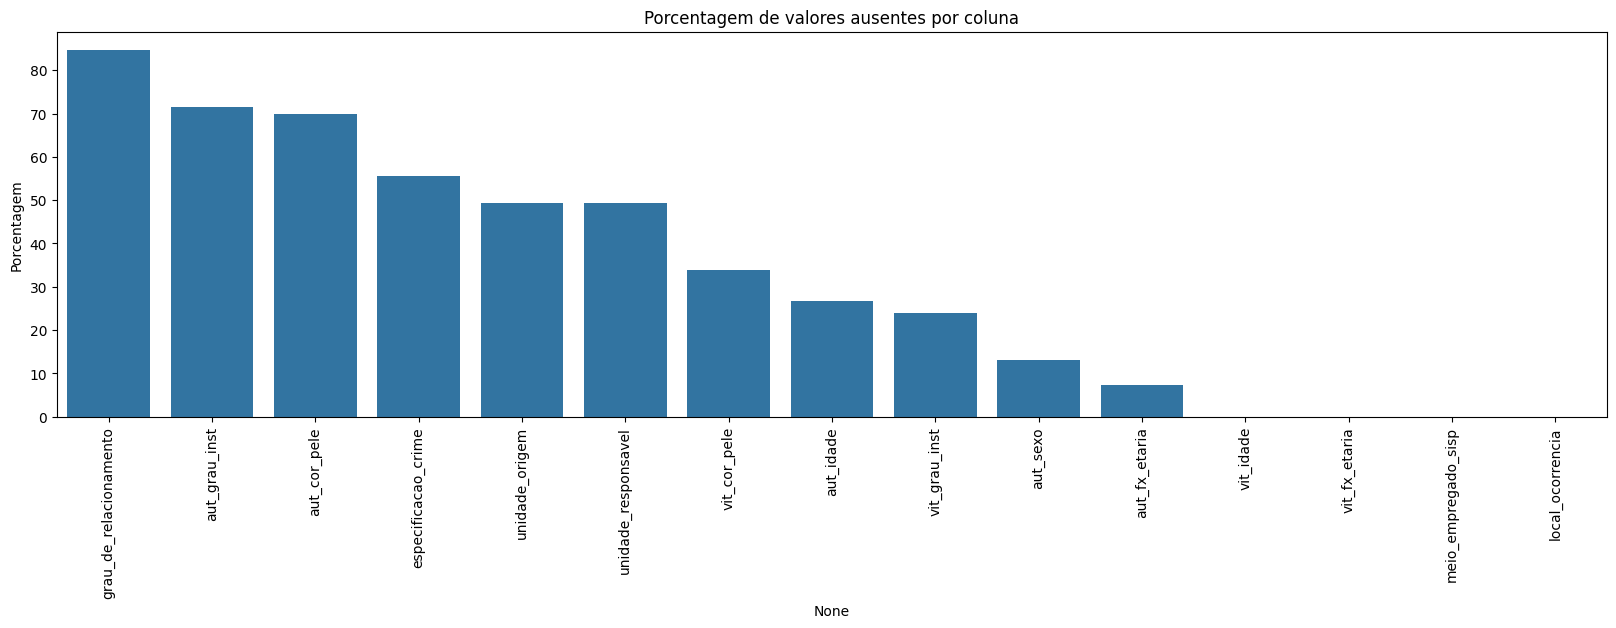

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x=missing.index, y=missing["Porcentagem"])
plt.xticks(rotation='vertical')
plt.title(f"Porcentagem de valores ausentes por coluna")
plt.show()

- Como as colunas "local_ocorrencia" e "meio_empregado_sisp"  tem poucos valores missing, serao removidas apenas as linhas com valores faltantes

In [ ]:
crimes_df.dropna(subset=["local_ocorrencia","meio_empregado_sisp"], inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_18484\1495398229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df.dropna(subset=["local_ocorrencia","meio_empregado_sisp"], inplace=True)


In [ ]:
crimes_df.reset_index(drop=True, inplace=True)


In [ ]:
missing_by_column_after = crimes_df.isnull().sum()
absol_miss_after = missing_by_column_after[missing_by_column_after > 0].sort_values(ascending=False)
perce_miss_after = absol_miss_after / crimes_df.shape[0] * 100
dtype_miss_after = pd.Series({x: crimes_df[x].dtype for x in absol_miss_after.index})

missing_after = pd.concat([dtype_miss_after, absol_miss_after, perce_miss_after], axis=1)
missing_after.columns = ["dtypes", "Absoluto", "Porcentagem"]
missing_after

,dtypes,Absoluto,Porcentagem
grau_de_relacionamento,object,202637,84.665619
aut_grau_inst,object,171291,71.568660
aut_cor_pele,object,167394,69.940419
especificacao_crime,object,133122,55.620921
unidade_origem,object,117951,49.282187
unidade_responsavel,object,117951,49.282187
vit_cor_pele,object,81234,33.941121
aut_idade,float64,63777,26.647252
vit_grau_inst,object,57387,23.977388
aut_sexo,object,31514,13.167153


### Tratamento de valores NaN

Dada a considerável presença de dados nulos, excedendo 50% em várias colunas, a abordagem adotada para mitigar essa lacuna consistirá na substituição dos valores NaN por meio do rótulo "Não informado", visando evitar a perda significativa de dados.

In [ ]:
colunas_com_NaN = ["grau_de_relacionamento","aut_grau_inst","aut_cor_pele","especificacao_crime",
                   "unidade_responsavel","unidade_origem","vit_cor_pele","aut_idade","vit_grau_inst",
                   "aut_sexo","aut_fx_etaria","vit_idade","vit_fx_etaria"]
crimes_df.loc[:, colunas_com_NaN] = crimes_df.loc[:, colunas_com_NaN].fillna("Nao informado")

In [ ]:
crimes_df.isnull().sum()

unidade_origem            0
unidade_responsavel       0
dia_semana                0
fx_4_hor                  0
fx_12_hr                  0
mes_fato                  0
ano_fato                  0
consolidado               0
especificacao_crime       0
causa_presumivel          0
meio_empregado_sisp       0
bairros                   0
local_ocorrencia          0
vit_idade                 0
vit_fx_etaria             0
vit_sexo                  0
vit_cor_pele              0
vit_grau_inst             0
aut_idade                 0
aut_fx_etaria             0
aut_sexo                  0
grau_de_relacionamento    0
aut_cor_pele              0
aut_grau_inst             0
dtype: int64

### Abordando inconsistências

Durante esta fase, procederemos com a normalização de valores que foram registrados de maneiras diversas, mas que representam o mesmo conceito e tratamento de informacoes nao pertinentes.

1. Verificar os objetos diferentes que compoem cada coluna e quantos se repetem

- local_ocorrencia

In [ ]:
local_ocorrencia_unico = crimes_df["local_ocorrencia"].unique().tolist()
print("Numero unico de local_ocorrencia: ", len(local_ocorrencia_unico))
local_ocorrencia_unico

Numero unico de local_ocorrencia:  194


['VIA PUBLICA',
 'TRANSPORTE',
 'OUTROS',
 'RESIDENCIA PARTICULAR',
 'MAR, RIO, LAGOA',
 'CAFE,BAR,ETC',
 'HOSPITAL',
 'OUTROS ESTADOS',
 'ESTABELECIMENTO BANCARIO',
 'CONDOMINIO COMERCIAL',
 'ESTABELECIMENTO DE ENSINO',
 'LOGRADORO PUBLICO',
 'INTERNET',
 'CASA COMERCIAL',
 'CAFE, BAR, RESTAURANTE',
 'PREDIO',
 'CONDOMINIO RESIDENCIAL',
 'EDIFICIO PUBLICO',
 'VIA PUBLICA ',
 'CASA DE TOLERANCIA',
 'CRECHE',
 'LOJAS DE CONVENIENCIA',
 'TRANSPORTE ',
 'CASA COMERCIAL ',
 'CAIXA ELETRONICO',
 'LOJA ',
 'LOJA',
 'VIA FERREA',
 'FARMACIA',
 'REDIDENCIA PARTICULAR ',
 'HOTEL, PENSAO, ETC',
 'HABITACAO COLETIVA',
 'SUPERMERCADO',
 'OUTROS PAISES',
 'PENITENCIARIA, REFORMATORIO',
 'PREDIO EM OBRAS',
 'MERCADINHO',
 'LOJA DE CONVENIENCIA ',
 'IGREJA',
 'SALAO DE BELEZA',
 'POSTO DE GASOLINA',
 'CLINICA ',
 'TERRENO BALDIO',
 'COOPERATIVA',
 'CAMPUS UNIVERSITARIO',
 'CRAS',
 'ORGAO PUBLICO',
 'PANIFICADORA',
 'BAR',
 'FARMACIA ',
 'CLUBE',
 'SALAO DE BELEZA ',
 'EMPRESA',
 'CONSULTORIO',
 'TRAN

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "VIA PUBLICA ",'local_ocorrencia'] = 'VIA PUBLICA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE ",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE URBANO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE PUBLICO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE POR APLICATIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPOSTE PUBLICO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANPORTE COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE (COLETIVO, PRIVADO OU ESCOLAR)",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSPORTE COLETVIO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM COLETIVO",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR, RIO, LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR,RIO,LAGOA",'local_ocorrencia'] = 'MAR, RIO, LAGOA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR, RIO E LAGOA",'local_ocorrencia']= 'MAR, RIO, LAGOA'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "PORTO",'local_ocorrencia']=  'PORTOS / MARINAS / ATRACADOUROS',

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "MAR / OCEANO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "REPRESAS",'local_ocorrencia']='MAR, RIO, LAGOA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "RIO",'local_ocorrencia']='MAR, RIO, LAGOA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "IGARAPE",'local_ocorrencia']='MAR, RIO, LAGOA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "RESTAURANTE ",'local_ocorrencia'] =  'CAFE, BAR, RESTAURANTE, ETC'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "HOSPITAL ",'local_ocorrencia'] = 'HOSPITAL'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO DE COMERCIAL",'local_ocorrencia'] = 'ESTABELECIMENTO COMERCIAL'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO PRISIONAL",'local_ocorrencia'] = 'PENITENCIARIA, REFORMATORIO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (INTERNET)",'local_ocorrencia'] = 'INTERNET'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (NTERNET)",'local_ocorrencia'] = 'INTERNET'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL (PIX)",'local_ocorrencia'] = 'INTERNET'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMBIENTE VIRTUAL",'local_ocorrencia'] = 'INTERNET'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "INTERNET (REDES SOCIAIS, APLICATIVOS DE MENSAGENS, E-MAIL, SITES, BLOGS, PORTAIS E OUTROS)",'local_ocorrencia'] = 'INTERNET'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "CASA COMERCIAL ",'local_ocorrencia'] = 'CASA COMERCIAL'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO EM OBRAS",'local_ocorrencia'] = 'PREDIO'


In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO DO JORNAL",'local_ocorrencia'] = 'PREDIO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "PREDIO/PALACIO DO RADIO",'local_ocorrencia'] = 'PREDIO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJA ",'local_ocorrencia'] = 'LOJA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "AMERICANAS",'local_ocorrencia'] = 'LOJA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJA DE CONVENIENCIA ",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOJAS DE CONVENIENCIA",'local_ocorrencia'] =  'LOJA DE CONVENIENCIA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "VIA FERREA",'local_ocorrencia'] =   'ESTACAO FERROVIARIA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "FARMACIA ",'local_ocorrencia'] =   'FARMACIA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM RESIDENCIA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "PROPRIEDADE RESIDENCIAL URBANA",'local_ocorrencia'] = 'RESIDENCIA PARTICULAR'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "SUPERMERCADO ",'local_ocorrencia'] = 'SUPERMERCADO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "SUPERMERCADO LIDER",'local_ocorrencia'] = 'SUPERMERCADO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "SALAO DE BELEZA ",'local_ocorrencia'] = 'SALAO DE BELEZA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "POSTO DE GASOLINA ",'local_ocorrencia'] = 'POSTO DE GASOLINA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "POSTO DE SAUDE ",'local_ocorrencia'] = 'POSTO DE SAUDE'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLINICA ",'local_ocorrencia'] = 'CLINICA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "PANIFICADORA ",'local_ocorrencia'] = 'PANIFICADORA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLUBE\\r\\n",'local_ocorrencia'] = 'CLUBE'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "CLUBES E AGREMIACOES",'local_ocorrencia'] = 'CLUBE'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "INDUSTRIA",'local_ocorrencia'] = 'ESTABELECIMENTO INDUSTRIAL'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTACIONAMENTO ",'local_ocorrencia'] = 'ESTACIONAMENTO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTACIONAMENTO BANCARIO",'local_ocorrencia'] = 'ESTACIONAMENTO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "PROSTIBULO",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "CASA DE TOLERANCIA",'local_ocorrencia'] = 'LOCAL DE PROSTITUICAO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTADIO DE FUTEBOL",'local_ocorrencia'] = 'ESTADIO ESPORTIVO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "LANCHONETE ",'local_ocorrencia'] =  'LANCHONETE'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "SHOPPING ",'local_ocorrencia'] =  'SHOPPING'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "SHOPPING BOULEVARD",'local_ocorrencia'] =  'SHOPPING'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "DEPOSITO ",'local_ocorrencia'] =  'DEPOSITO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "DEPOSITO DE GAS ",'local_ocorrencia'] =  'DEPOSITO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "LOCADORA DE AUTOMOVEIS",'local_ocorrencia'] =  'LOCADORA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "SINDICATO E ASSOCIACAO DE CLASSE",'local_ocorrencia'] =  'SINDICATO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "EM VEICULO",'local_ocorrencia'] = 'VEICULO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "CARRO DE TRANSPORTE DE VALORES",'local_ocorrencia'] = 'CARRO FORTE'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "ABRIGO",'local_ocorrencia'] = 'CASA DE ABRIGO E ASSISTENCIA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "ONIBUS",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "CENTRO LOTERICO",'local_ocorrencia'] = 'LOTERICA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "ESTABELECIMENTO LOTERICO",'local_ocorrencia'] = 'LOTERICA'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "TRANSORTE",'local_ocorrencia'] = 'TRANSPORTE(PUBLICO, URBANO, ETC)'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "HOTEL",'local_ocorrencia'] = 'HOTEL, PENSAO, ETC'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "AEROPORTOS / PISTA DE POUSO",'local_ocorrencia'] = 'AEROPORTO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "SEM INFORMACAO",'local_ocorrencia'] =  'NAO INFORMADO'

In [ ]:
crimes_df.loc[crimes_df.local_ocorrencia == "OUTRO",'local_ocorrencia'] = 'OUTROS LOCAIS'


In [ ]:
novo_local_ocorrencia_unico = crimes_df["local_ocorrencia"].unique()
print("Numero unico de local_ocorrencia:", len(novo_local_ocorrencia_unico))
novo_local_ocorrencia_unico


Numero unico de local_ocorrencia: 125


array(['VIA PUBLICA', 'TRANSPORTE', 'OUTROS', 'RESIDENCIA PARTICULAR',
       'MAR, RIO, LAGOA', 'CAFE,BAR,ETC', 'HOSPITAL', 'OUTROS ESTADOS',
       'ESTABELECIMENTO BANCARIO', 'CONDOMINIO COMERCIAL',
       'ESTABELECIMENTO DE ENSINO', 'LOGRADORO PUBLICO', 'INTERNET',
       'CASA COMERCIAL', 'CAFE, BAR, RESTAURANTE', 'PREDIO',
       'CONDOMINIO RESIDENCIAL', 'EDIFICIO PUBLICO',
       'LOCAL DE PROSTITUICAO', 'CRECHE', 'LOJA DE CONVENIENCIA',
       'TRANSPORTE(PUBLICO, URBANO, ETC)', 'CAIXA ELETRONICO', 'LOJA',
       'ESTACAO FERROVIARIA', 'FARMACIA', 'REDIDENCIA PARTICULAR ',
       'HOTEL, PENSAO, ETC', 'HABITACAO COLETIVA', 'SUPERMERCADO',
       'OUTROS PAISES', 'PENITENCIARIA, REFORMATORIO', 'MERCADINHO',
       'IGREJA', 'SALAO DE BELEZA', 'POSTO DE GASOLINA', 'CLINICA',
       'TERRENO BALDIO', 'COOPERATIVA', 'CAMPUS UNIVERSITARIO', 'CRAS',
       'ORGAO PUBLICO', 'PANIFICADORA', 'BAR', 'CLUBE', 'EMPRESA',
       'CONSULTORIO', 'ESTABELECIMENTO INDUSTRIAL', 'LOTERICA',
   

- Grau de relacionamento

In [ ]:
grau_de_relac_unico = crimes_df["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(grau_de_relac_unico))
grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 62


array(['Nao informado', 'NAO INFORMADO', 'COMPANHEIRO(A)',
       'EX-COMPANHEIRO(A)', 'VIZINHO(A)', 'PADRASTO', 'PAI', 'IRMAO(A)',
       'AVO', 'AMIGO(A)', 'SOGRO(A)', 'TIO(A)', 'PRIMO(A)', 'SOBRINHO(A)',
       'CONHECIDO(A)', 'NAMORADO(A)', 'EX-NAMORADO(A)', 'FILHO(A)', 'MAE',
       'GENRO', 'CUNHADO(A)', 'EX-CUNHADO(A)', 'MADRASTA', 'NETO(A)',
       'EX-PADRASTO', 'PADRINHO', 'EX-NORA', 'EX-PADASTRO', 'NORA',
       'PARENTESCO POR AFINIDADE', 'PREJUDICADO', 'PJ, EP E OUTROS',
       'ENTEADO(A)', 'EX-MADRASTA', 'EX-GENRO', 'MARIDO', 'BISAVO',
       'EX-SOGRO(A)', 'NETO', 'MADRINHA', 'CHEFE',
       'PARENTE POR AFINIDADE', 'PROFESSOR(A)', 'POR AFINIDADE',
       'EX - CUNHADO(A)', 'PRIMA', 'TIO', 'TIO(A', 'EX-AMANTE',
       'EX-CUNHADA', 'EX-SOGRA', 'EX-SOGRO (A)', 'EX-CUNHADO (A)',
       'JOSIVAN CONCEICAO DOS SANTOS', 'PREJUDUICADO',
       'PARENTESCO POR AFINIDADE ', 'PREJUDICAOD', 'EX COMPANHEIRO',
       'PREJUICADO', 'EX-CUNHDO (A)', 'PAI DO PADRASTO', 'EX-ENTEADO(A)'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "Nao informado",'grau_de_relacionamento'] = 'NAO INFORMADO'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX COMPANHEIRO",'grau_de_relacionamento'] =  'EX-COMPANHEIRO(A)'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "TIO",'grau_de_relacionamento'] =  'TIO(A)'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "TIO(A",'grau_de_relacionamento'] =  'TIO(A)'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PRIMA",'grau_de_relacionamento'] =  'PRIMO(A)'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX - CUNHADO(A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHADA",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHADO (A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-CUNHDO (A)",'grau_de_relacionamento'] =  'EX-CUNHADO(A)'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "NETO",'grau_de_relacionamento'] =  'NETO(A)'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-PADASTRO",'grau_de_relacionamento'] =  'EX-PADRASTO'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PARENTESCO POR AFINIDADE ",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PARENTE POR AFINIDADE",'grau_de_relacionamento'] =  'PARENTESCO POR AFINIDADE'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUDUICADO",'grau_de_relacionamento'] =  'PREJUDICADO'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUDICAOD",'grau_de_relacionamento'] =  'PREJUDICADO'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "PREJUICADO",'grau_de_relacionamento'] =  'PREJUDICADO'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-SOGRA",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [ ]:
crimes_df.loc[crimes_df.grau_de_relacionamento == "EX-SOGRO (A)",'grau_de_relacionamento'] =   'EX-SOGRO(A)'

In [ ]:
crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst
192016,Nao informado,Nao informado,TER,18 |-- 24,20 |-- 22,JUNHO,2022,FURTO,EM COLETIVO/CELULAR,AMBICAO,SEM INSTRUMENTO,CAMPINA,VEICULO,22.0,ADULTO I (18 A 24 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,32.0,ADULTO III (30 A 34 ANOS),M,JOSIVAN CONCEICAO DOS SANTOS,PARDA,NAO ALFABETIZADO


Como o crime consolidado não corresponde de fato a um crime contra a mulher, esta linha será excluida

In [ ]:
crimes_df.drop(crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"].index, inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_18484\1255400602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df.drop(crimes_df[crimes_df['grau_de_relacionamento'] == "JOSIVAN CONCEICAO DOS SANTOS"].index, inplace=True)


In [ ]:
crimes_df.reset_index(drop=True, inplace=True)

In [ ]:
crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst
73922,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,QUI,12 |-- 18,16 |-- 18,NOVEMBRO,2020,HOMICIDIO CULPOSO,ERRO MEDICO,OUTRAS,OUTROS MEIOS,PARQUE VERDE,HOSPITAL,23.0,ADULTO I (18 A 24 ANOS),F,Nao informado,ENSINO MEDIO COMPLETO,88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
74985,SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP,SACRAMENTA - 1ª SECCIONAL - 1ª RISP - 7ª AISP,SAB,12 |-- 18,16 |-- 18,DEZEMBRO,2020,LESAO DECORRENTE DE INTERVENCAO DE AGENTE DO E...,INTERVENCAO POLICIAL,OUTRAS,ARMA DE FOGO,BARREIRO,VIA PUBLICA,24.0,ADULTO I (18 A 24 ANOS),F,PARDA,Nao informado,88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
82412,DEL.VIRTUAL - 277,BENGUI - UNID.POLICIA 412- 1º RISP-10ª AISP,SAB,18 |-- 24,18 |-- 20,AGOSTO,2020,PARA FINS DE DIREITO,CONTRA O CONSUMIDOR,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,BENGUI,OUTROS,27.0,ADULTO II (25 A 29 ANOS),F,NAO INFORMADO,NAO INFORMADO,88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
104584,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,SEG,18 |-- 24,18 |-- 20,AGOSTO,2020,PERTURBACAO DO SOSSEGO ALHEIO,NAO INFORMADO,OUTRAS,OUTROS MEIOS,CREMACAO,OUTROS,53.0,ADULTO IV (35 A 64 ANOS),F,NAO INFORMADO,ENSINO SUPERIOR COMPLETO,88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
104587,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,DELEGACIA DE REPRESSAO A POLUICAO E OUTROS CRI...,SEG,18 |-- 24,18 |-- 20,AGOSTO,2020,PERTURBACAO DO SOSSEGO ALHEIO,NAO INFORMADO,OUTRAS,OUTROS MEIOS,CREMACAO,OUTROS,37.0,ADULTO IV (35 A 64 ANOS),F,NAO INFORMADO,ENSINO SUPERIOR COMPLETO,88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
107949,DIVISAO DE HOMICIDIOS,DIVISAO DE HOMICIDIOS,SEX,06 |-- 12,06 |-- 08,DEZEMBRO,2020,APRESENTACAO - MANDADO DE PRISAO,Nao informado,OUTRAS,SEM INSTRUMENTO,UMARIZAL,HOSPITAL,47.0,ADULTO IV (35 A 64 ANOS),F,Nao informado,Nao informado,88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
108583,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,QUI,12 |-- 18,14 |-- 16,AGOSTO,2020,ESTELIONATO,MEDIANTE FRAUDE,AMBICAO,SEM INSTRUMENTO,CABANAGEM,RESIDENCIA PARTICULAR,40.0,ADULTO IV (35 A 64 ANOS),F,NAO INFORMADO,ENSINO MEDIO COMPLETO,88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
110920,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,CABANAGEM - DELEGACIA DE POLICIA - 1ª RISP - 1...,QUI,12 |-- 18,14 |-- 16,AGOSTO,2020,ESTELIONATO,MEDIANTE FRAUDE,AMBICAO,SEM INSTRUMENTO,CABANAGEM,RESIDENCIA PARTICULAR,17.0,ADOLESCENTE (12 A 17 ANOS),F,NAO INFORMADO,ENSINO MEDIO COMPLETO,88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
117444,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,SAO BRAS - 2º SECCIONAL -1º RISP- 2ª AISP,QUI,18 |-- 24,18 |-- 20,OUTUBRO,2020,OMISSAO DE SOCORRO,NAO INFORMADO,OUTRAS,SEM INSTRUMENTO,SAO BRAS,HOSPITAL,83.0,IDOSO (65 ANOS OU MAIS),F,Nao informado,ENSINO MEDIO COMPLETO,88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"
118350,DEL.VIRTUAL - 277,BENGUI - UNID.POLICIA 412- 1º RISP-10ª AISP,TER,12 |-- 18,12 |-- 14,SETEMBRO,2020,ESTELIONATO,Nao informado,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,BENGUI,RESIDENCIA PARTICULAR,46.0,ADULTO IV (35 A 64 ANOS),F,Nao informado,Nao informado,88888.0,"PJ, EP E OUTROS",PJ,"PJ, EP E OUTROS","PJ, EP E OUTROS","PJ, EP E OUTROS"


As linhas em que a coluna "grau_de_relacionamento" está preenchida com o valor "PJ, EP, OUTROS" serão removidas, dado que tal condição não possui impacto significativo na análise.

In [ ]:
crimes_df.drop(crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_18484\4102231103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df.drop(crimes_df.loc[crimes_df['grau_de_relacionamento']=='PJ, EP E OUTROS'].index, inplace=True)


In [ ]:
novo_grau_de_relac_unico = crimes_df["grau_de_relacionamento"].unique()
print("numero de itens unicos em grau_de_relacionamento:", len(novo_grau_de_relac_unico))
novo_grau_de_relac_unico

numero de itens unicos em grau_de_relacionamento: 41


array(['NAO INFORMADO', 'COMPANHEIRO(A)', 'EX-COMPANHEIRO(A)',
       'VIZINHO(A)', 'PADRASTO', 'PAI', 'IRMAO(A)', 'AVO', 'AMIGO(A)',
       'SOGRO(A)', 'TIO(A)', 'PRIMO(A)', 'SOBRINHO(A)', 'CONHECIDO(A)',
       'NAMORADO(A)', 'EX-NAMORADO(A)', 'FILHO(A)', 'MAE', 'GENRO',
       'CUNHADO(A)', 'EX-CUNHADO(A)', 'MADRASTA', 'NETO(A)',
       'EX-PADRASTO', 'PADRINHO', 'EX-NORA', 'NORA',
       'PARENTESCO POR AFINIDADE', 'PREJUDICADO', 'ENTEADO(A)',
       'EX-MADRASTA', 'EX-GENRO', 'MARIDO', 'BISAVO', 'EX-SOGRO(A)',
       'MADRINHA', 'CHEFE', 'PROFESSOR(A)', 'EX-AMANTE',
       'PAI DO PADRASTO', 'EX-ENTEADO(A)'], dtype=object)

- vit_fx_etaria	

In [ ]:
vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("numero de itens unicos em vit_fx_etaria:", len(vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

numero de itens unicos em vit_fx_etaria: 13


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113116
ADULTO I (18 A 24 ANOS)        33119
ADULTO III (30 A 34 ANOS)      28380
ADULTO II (25 A 29 ANOS)       27867
IDOSO (65 ANOS OU MAIS)        15376
PREJUDICADO                    13553
ADOLESCENTE (12 A 17 ANOS)      3222
NAO INFORMADO                   3131
CRIANCA (0 A 11 ANOS)           1457
PJ, EP E OUTROS                   62
Nao informado                     37
JA LANCADO                         2
IDOSO(A)                           2
Name: count, dtype: int64

In [ ]:
crimes_df.loc[crimes_df['vit_fx_etaria']=='PJ, EP E OUTROS']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst
118777,DEL.VIRTUAL - 277,CABANAGEM- UNID.POL.292-1º RISP- 10ª AISP,QUA,06 |-- 12,10 |-- 12,DEZEMBRO,2020,ROUBO,AO ESTABELECIMENTO COMERCIAL,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,CABANAGEM,OUTROS,88888.0,"PJ, EP E OUTROS",F,Nao informado,Nao informado,Nao informado,Nao informado,M,NAO INFORMADO,Nao informado,Nao informado
121086,DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP,DEAM - DEL.VIRTUAL DA MULHER 294-1º RISP- 8ª AISP,SEG,12 |-- 18,14 |-- 16,DEZEMBRO,2020,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,TAPANA,OUTROS,88888.0,"PJ, EP E OUTROS",F,Nao informado,NAO INFORMADO,Nao informado,Nao informado,Nao informado,NAO INFORMADO,Nao informado,Nao informado
139473,Nao informado,Nao informado,SEG,00 |-- 06,00 |-- 02,AGOSTO,2021,FURTO,CABO,OUTRAS,SEM INSTRUMENTO,SAO BRAS,VIA PUBLICA,88888.0,"PJ, EP E OUTROS",F,"PJ, EP E OUTROS","PJ, EP E OUTROS",99999.0,NAO INFORMADO,NI,NAO INFORMADO,Nao informado,Nao informado
140375,Nao informado,Nao informado,TER,06 |-- 12,06 |-- 08,AGOSTO,2021,FURTO,EM COLETIVO,OUTRAS,SEM INSTRUMENTO,SOUZA,TRANSPORTE,88888.0,"PJ, EP E OUTROS",F,"PJ, EP E OUTROS","PJ, EP E OUTROS",66666.0,PREJUDICADO,P,NAO INFORMADO,PREJUDICADO,PREJUDICADO
203781,Nao informado,Nao informado,DOM,18 |-- 24,18 |-- 20,AGOSTO,2022,INJURIA,Nao informado,OUTRAS,OUTROS MEIOS,AGUAS NEGRAS,LOGRADORO PUBLICO,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO MEDIO COMPLETO,Nao informado,PREJUDICADO,P,NAO INFORMADO,PARDA,Nao informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233214,Nao informado,Nao informado,SEG,06 |-- 12,06 |-- 08,AGOSTO,2022,ACIDENTE DE TRANSITO SEM VITIMA,Nao informado,OUTRAS,OUTROS MEIOS,MARCO,VIA PUBLICA,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,Nao informado,PREJUDICADO,P,NAO INFORMADO,Nao informado,Nao informado
233215,Nao informado,Nao informado,SEX,18 |-- 24,22 |-- 24,AGOSTO,2022,FALSA IDENTIDADE,Nao informado,OUTRAS,OUTROS MEIOS,FATIMA,INTERNET,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,Nao informado,PREJUDICADO,P,NAO INFORMADO,Nao informado,Nao informado
233216,Nao informado,Nao informado,SEG,12 |-- 18,12 |-- 14,AGOSTO,2022,FALSA IDENTIDADE,Nao informado,OUTRAS,OUTROS MEIOS,TAPANA,INTERNET,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO SUPERIOR COMPLETO,Nao informado,PREJUDICADO,P,NAO INFORMADO,Nao informado,Nao informado
233217,Nao informado,Nao informado,DOM,18 |-- 24,22 |-- 24,AGOSTO,2022,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,COQUEIRO BELEM,RESIDENCIA PARTICULAR,88888.0,"PJ, EP E OUTROS",F,PREJUDICADO,ENSINO MEDIO INCOMPLETO,Nao informado,PREJUDICADO,P,NAO INFORMADO,Nao informado,Nao informado


In [ ]:
filtro_vit_fx_etaria = (crimes_df['vit_fx_etaria'] == 'PJ, EP E OUTROS')
filtrado_vit_fx_etaria = crimes_df[filtro_vit_fx_etaria] 
tipos_consolidado = filtrado_vit_fx_etaria['consolidado'].value_counts()

In [ ]:
tipos_consolidado

consolidado
AMEACA                                11
ROUBO                                  7
ESTELIONATO                            7
INJURIA                                5
FALSA IDENTIDADE                       5
ACIDENTE DE TRANSITO SEM VITIMA        5
INVASAO DE DISPOSITIVO INFORMATICO     5
FURTO                                  5
PARA FINS DE DIREITO                   3
RECUPERACAO DE VEICULOS                1
PESSOA ENCONTRADA                      1
DANO CIVIL                             1
ACIDENTE FORTUITO COM LESAO            1
FALSIDADE IDEOLOGICA                   1
ESTUPRO                                1
COMUNICACAO DE OBITO                   1
LESAO CORPORAL                         1
MAUS TRATOS                            1
Name: count, dtype: int64

Agora poderemos separar apenas crimes que podem ser considerados crimes contra a mulher.


In [ ]:
crimes_df.drop(crimes_df[((crimes_df['vit_fx_etaria'] == 'PJ, EP E OUTROS') & (crimes_df['consolidado'].isin(['ROUBO', 'ESTELIONATO','FALSA IDENTIDADE','ACIDENTE DE TRANSITO SEM VITIMA','FURTO','PARA FINS DE DIREITO','RECUPERACAO DE VEICULOS','PESSOA ENCONTRADA','ACIDENTE FORTUITO COM LESAO','FALSIDADE IDEOLOGICA','COMUNICACAO DE OBITO'])))].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_18484\3319258662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df.drop(crimes_df[((crimes_df['vit_fx_etaria'] == 'PJ, EP E OUTROS') & (crimes_df['consolidado'].isin(['ROUBO', 'ESTELIONATO','FALSA IDENTIDADE','ACIDENTE DE TRANSITO SEM VITIMA','FURTO','PARA FINS DE DIREITO','RECUPERACAO DE VEICULOS','PESSOA ENCONTRADA','ACIDENTE FORTUITO COM LESAO','FALSIDADE IDEOLOGICA','COMUNICACAO DE OBITO'])))].index, inplace=True)


In [ ]:
crimes_df.loc[crimes_df.vit_fx_etaria == "IDOSO(A)",'vit_fx_etaria'] = 'IDOSO (65 ANOS OU MAIS)'

In [ ]:
crimes_df.loc[crimes_df.vit_fx_etaria == "Nao informado",'vit_fx_etaria'] = 'NAO INFORMADO'

In [ ]:
crimes_df.loc[crimes_df['vit_fx_etaria']=='PREJUDICADO']

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst
3,DEL.VIRTUAL - 277,MARCO - UNID.POL. 14 - 1º RISP,DOM,18 |-- 24,18 |-- 20,ABRIL,2019,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,ARMA DE FOGO,MARCO,VIA PUBLICA,66666.0,PREJUDICADO,F,Nao informado,Nao informado,99999.0,NAO INFORMADO,M,NAO INFORMADO,Nao informado,Nao informado
4,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,QUA,06 |-- 12,10 |-- 12,ABRIL,2019,ROUBO,TRANSEUNTE/CELULAR,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MARAMBAIA,VIA PUBLICA,66666.0,PREJUDICADO,F,Nao informado,NAO INFORMADO,99999.0,NAO INFORMADO,M,NAO INFORMADO,Nao informado,Nao informado
5,DEL.VIRTUAL - 277,MARAMBAIA - PATRIMONIO 248 - 1º RISP- 9ª AISP,SEX,12 |-- 18,12 |-- 14,JUNHO,2019,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,MARAMBAIA,VIA PUBLICA,66666.0,PREJUDICADO,F,Nao informado,NAO INFORMADO,99999.0,NAO INFORMADO,NI,NAO INFORMADO,Nao informado,NAO INFORMADO
6,DEL.VIRTUAL - 277,SAO BRAS - PATRIMONIO 228 - 1º RISP- 2ª AISP,QUA,12 |-- 18,14 |-- 16,JUNHO,2019,ROUBO,TRANSEUNTE,IMPERICIA / IMPRUDENCIA / NEGLIGENCIA,SEM INSTRUMENTO,NAZARE,VIA PUBLICA,66666.0,PREJUDICADO,F,Nao informado,NAO INFORMADO,99999.0,NAO INFORMADO,M,NAO INFORMADO,Nao informado,NAO INFORMADO
11,GUANABARA - DELEGACIA DE POLICIA - 2ª RISP - 1...,MARAMBAIA - 5ª SECCIONAL - 1ª RISP - 9ª AISP,QUI,12 |-- 18,12 |-- 14,MAIO,2019,ROUBO,TRANSEUNTE/CELULAR,AMBICAO,ARMA DE FOGO,CASTANHEIRA,VIA PUBLICA,66666.0,PREJUDICADO,F,Nao informado,Nao informado,99999.0,NAO INFORMADO,NI,NAO INFORMADO,Nao informado,Nao informado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238753,Nao informado,Nao informado,SEX,18 |-- 24,18 |-- 20,ABRIL,2022,ROUBO,TRANSEUNTE,OUTRAS,OUTROS MEIOS,MANGUEIRAO,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,66666.0,PREJUDICADO,M,NAO INFORMADO,PARDA,PREJUDICADO
238828,Nao informado,Nao informado,DOM,18 |-- 24,20 |-- 22,MAIO,2022,LESAO NO TRANSITO,COLISAO,OUTRAS,ONIBUS,MURUBIRA,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,46.0,ADULTO IV (35 A 64 ANOS),M,NAO INFORMADO,PREJUDICADO,ENSINO MEDIO COMPLETO
238830,Nao informado,Nao informado,SEX,12 |-- 18,14 |-- 16,MAIO,2022,COMUNICACAO DE OBITO,MORTE NATURAL,OUTRAS,SEM INSTRUMENTO,COQUEIRO BELEM,RESIDENCIA PARTICULAR,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,66666.0,PREJUDICADO,P,NAO INFORMADO,PREJUDICADO,PREJUDICADO
239221,Nao informado,Nao informado,SEG,06 |-- 12,08 |-- 10,MAIO,2022,LESAO NO TRANSITO,COLISAO,OUTRAS,OUTROS MEIOS,VAL-DE-CANS,VIA PUBLICA,66666.0,PREJUDICADO,F,PREJUDICADO,PREJUDICADO,61.0,ADULTO IV (35 A 64 ANOS),F,NAO INFORMADO,PREJUDICADO,ENSINO MEDIO COMPLETO


In [ ]:
filtro_vit_fx_etaria_1 = (crimes_df['vit_fx_etaria'] == 'PREJUDICADO')
filtrado_vit_fx_etaria_1 = crimes_df[filtro_vit_fx_etaria_1]
idade_vit = filtrado_vit_fx_etaria_1['vit_idade'].value_counts()

In [ ]:
idade_vit

vit_idade
66666.0          12524
99999.0            977
Nao informado       33
118.0               12
36.0                 2
41.0                 2
32.0                 1
37.0                 1
88888.0              1
Name: count, dtype: int64

In [ ]:
crimes_df[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 36.0)]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_idade,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst
31891,DELEGACIA DE CONTROLE DE CRIMES VIOLENTOS - PSM,COMERCIO - 6ª SECCIONAL - 1ª RISP - 1ª AISP,SEG,06 |-- 12,10 |-- 12,OUTUBRO,2019,LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA DA PENHA,ODIO OU VINGANCA,OUTROS MEIOS,UMARIZAL,RESIDENCIA PARTICULAR,36.0,PREJUDICADO,F,PARDA,NAO INFORMADO,99999.0,NAO INFORMADO,F,FILHO(A),Nao informado,NAO INFORMADO
39376,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,PEDREIRA - 10ª SECCIONAL - 1ª RISP - 8ª AISP,DOM,12 |-- 18,14 |-- 16,AGOSTO,2019,LESAO CORPORAL,VIOLENCIA DOMESTICA/MARIA DA PENHA,OUTRAS,OUTROS MEIOS,PEDREIRA,RESIDENCIA PARTICULAR,36.0,PREJUDICADO,F,PARDA,NAO INFORMADO,99999.0,NAO INFORMADO,M,IRMAO(A),Nao informado,NAO INFORMADO


In [ ]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 36.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [ ]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 41.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

In [ ]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 32.0), 'vit_fx_etaria'] = 'ADULTO III (30 A 34 ANOS)'

In [ ]:
crimes_df.loc[(crimes_df['vit_fx_etaria'] == 'PREJUDICADO') & (crimes_df['vit_idade'] == 37.0), 'vit_fx_etaria'] = 'ADULTO IV (35 A 64 ANOS)'

Agora a coluna 'vit_idade' pode ser excluida 

In [ ]:
crimes_df = crimes_df.drop(columns=['vit_idade'])
crimes_df.reset_index(drop=True, inplace=True)

In [ ]:
novo_vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 11


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113121
ADULTO I (18 A 24 ANOS)        33119
ADULTO III (30 A 34 ANOS)      28381
ADULTO II (25 A 29 ANOS)       27867
IDOSO (65 ANOS OU MAIS)        15378
PREJUDICADO                    13547
ADOLESCENTE (12 A 17 ANOS)      3222
NAO INFORMADO                   3168
CRIANCA (0 A 11 ANOS)           1457
PJ, EP E OUTROS                   25
JA LANCADO                         2
Name: count, dtype: int64

In [ ]:
filtro_vit_fx_etaria_2 = (crimes_df['vit_fx_etaria'] == 'PREJUDICADO')
filtrado_vit_fx_etaria_2 = crimes_df[filtro_vit_fx_etaria_2]
tipos_consolidado_1 = filtrado_vit_fx_etaria_2['consolidado'].unique()
tipos_consolidado_1

array(['ROUBO', 'FURTO', 'PARA FINS DE DIREITO', 'LESAO NO TRANSITO',
       'HOMICIDIO', 'ROUBO DE VEICULO', 'APRESENTACAO SUSPEITO DE ROUBO',
       'DANO NO TRANSITO', 'APREENSAO DE OBJETOS', 'AMEACA',
       'LESAO CORPORAL', 'DANO', 'DESAPARECIMENTO DE PESSOA',
       'MORTE A ESCLARECER', 'COMUNICACAO DE OBITO',
       'RECUPERACAO DE VEICULOS', 'ACIDENTE FORTUITO COM DANO',
       'PARA FINS DE PROCEDIMENTO', 'POLUICAO SONORA',
       'AFOGAMENTO COM MORTE', 'JA LANCADO', 'HOMICIDIO CULPOSO',
       'ESTUPRO', 'PRODUZIR,REPRODUZIR,DIRIGIR,FOTOGRAFAR,FILMAR',
       'EXTORSAO', 'ESBULHO POSSESSORIO',
       'CUMPRIMENTO DE MANDADO DE BUSCA E APREENSAO',
       'ACIDENTE DE TRABALHO COM LESAO', 'IMPORTUNACAO SEXUAL',
       'PORTE ILEGAL DE ARMA DE FOGO DE USO PERMITIDO', 'OUTRAS FRAUDES',
       'ABORTO PROVOCADO PELA GESTANTE OU COM O SEU CONSENTIMENTO',
       'PERIGO DE CONTAGIO DE MOLESTIA GRAVE', 'ESTELIONATO',
       'SE O CRIME FOR PRATICADO CONTRA PESSOA COM DEFICIENCIA M

In [ ]:
crimes_df.drop(crimes_df[((crimes_df['vit_fx_etaria']== 'PREJUDICADO') & ~(crimes_df['consolidado'].isin(['LESAO CORPORAL', 'AMEACA', 'CONFLITOS FAMILIARES', 'ESTUPRO DE VULNERAVEL', 'TENTATIVA DE HOMICIDIO', 'MAUS TRATOS', 'LESAO CORPORAL CULPOSA', 'IMPORTUNACAO SEXUAL', 'ESTUPRO', 'INJURIA', 'VIAS DE FATO', 'HOMICIDIO', 'CONSTRANGIMENTO ILEGAL', 'TENTATIVA DE ESTUPRO DE VULNERAVEL', 'HOMICIDIO CULPOSO', 'DIFAMACAO', 'TENTATIVA DE ESTUPRO', 'ASSEDIO SEXUAL', 'INVASAO DE DISPOSITIVO INFORMATICO', 'ASSEDIO MORAL', 'VIOLACAO SEXUAL MEDIANTE FRAUDE', 'VIOLENCIA DOMESTICA E FAMILIAR CONTRA A MULHER', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS DE URGENCIA', 'DESCUMPRIMENTO DE MEDIDAS PROTETIVAS'])))].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

Como os valores 'PJ, EP E OUTROS', 'JA LANCADO' e  não são interessantes para a analise serão escluidos

In [ ]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_fx_etaria']=='JA LANCADO'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [ ]:
crimes_df.drop(crimes_df.loc[crimes_df['vit_fx_etaria']=='PJ, EP E OUTROS'].index, inplace=True)
crimes_df.reset_index(drop=True, inplace=True)

In [ ]:
novo_vit_fx_etaria_unico = crimes_df["vit_fx_etaria"].unique()
print("Number of unique vit_fx_etaria:", len(novo_vit_fx_etaria_unico))
crimes_df.vit_fx_etaria.value_counts()

Number of unique vit_fx_etaria: 9


vit_fx_etaria
ADULTO IV (35 A 64 ANOS)      113121
ADULTO I (18 A 24 ANOS)        33119
ADULTO III (30 A 34 ANOS)      28381
ADULTO II (25 A 29 ANOS)       27867
IDOSO (65 ANOS OU MAIS)        15378
ADOLESCENTE (12 A 17 ANOS)      3222
NAO INFORMADO                   3168
CRIANCA (0 A 11 ANOS)           1457
PREJUDICADO                      379
Name: count, dtype: int64

- meio_empregado_sisp

In [ ]:
crimes_df.meio_empregado_sisp.value_counts()

meio_empregado_sisp
SEM INSTRUMENTO                   104774
OUTROS MEIOS                      103226
ARMA DE FOGO                        8517
ARMA CORTANTE OU PERFURANTE         2260
AUTOMOVEL DE PASSEIO                2173
ARMA CONTUNDENTE                    1347
MOTOCICLETA                         1270
ARMA PERFURO CORTANTE               1053
ONIBUS                               532
AUTOMOVEL COMERCIAL                  311
BICICLETA                            238
CAMINHAO                             135
FOGO                                  86
NAO INFORMADO                         41
OUTROS                                29
VENENO - OUTROS TIPOS                 28
WHATSAPP                              28
VENENO - CHUMBINHO                    12
FACEBOOK                              12
INSTAGRAM                              8
AUTOMÓVEL DE PASSEIO                   6
TWITTER                                3
AUTOMÓVEL COMERCIAL                    2
ARMA PERFURO CORTANTE_X000D_\n       

In [ ]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "ARMA PERFURO CORTANTE_X000D_\n",'meio_empregado_sisp'] = 'ARMA PERFURO CORTANTE'

In [ ]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "AUTOMÓVEL COMERCIAL",'meio_empregado_sisp'] = 'AUTOMOVEL COMERCIAL'


In [ ]:
crimes_df.loc[crimes_df.meio_empregado_sisp == "OUTROS",'meio_empregado_sisp'] = 'OUTROS MEIOS'

In [ ]:
crimes_df.meio_empregado_sisp.value_counts()

meio_empregado_sisp
SEM INSTRUMENTO                104774
OUTROS MEIOS                   103255
ARMA DE FOGO                     8517
ARMA CORTANTE OU PERFURANTE      2260
AUTOMOVEL DE PASSEIO             2173
ARMA CONTUNDENTE                 1347
MOTOCICLETA                      1270
ARMA PERFURO CORTANTE            1054
ONIBUS                            532
AUTOMOVEL COMERCIAL               313
BICICLETA                         238
CAMINHAO                          135
FOGO                               86
NAO INFORMADO                      41
VENENO - OUTROS TIPOS              28
WHATSAPP                           28
VENENO - CHUMBINHO                 12
FACEBOOK                           12
INSTAGRAM                           8
AUTOMÓVEL DE PASSEIO                6
TWITTER                             3
Name: count, dtype: int64

- causa_presumivel

In [ ]:
crimes_df.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                   119539
IMPERICIA / IMPRUDENCIA / NEGLIGENCIA     42777
AMBICAO                                   32826
ODIO OU VINGANCA                          22270
CIUME                                      2256
DEVASSIDAO                                 2048
ALCOOLISMO / EMBRIAGUEZ                    1831
ACIDENTAL                                  1482
ENTORPECENTES                               357
ALIENACAO                                   333
AMBIÇÃO                                      82
AMBICÃO                                      74
LGBTFOBIA                                    61
ÓDIO OU VINGANÇA                             58
ÓDIO OU VINGANCA                             50
IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA        22
CIÚME                                        11
DEVASSIDÃO                                   10
ALIENAÇÃO                                     2
ROUBO                                         1
ALIENACÃO              

In [ ]:
crimes_df.loc[crimes_df.causa_presumivel == "IMPERICIA / IMPRUDENCIA / NEGLIGENCIA",'causa_presumivel'] = 'IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA'

In [ ]:
crimes_df.loc[crimes_df.causa_presumivel == "AMBICÃO",'causa_presumivel'] = 'AMBIÇÃO'

In [ ]:
crimes_df.loc[crimes_df.causa_presumivel == "ÓDIO OU VINGANCA",'causa_presumivel'] = 'ÓDIO OU VINGANÇA'

In [ ]:
crimes_df.loc[crimes_df.causa_presumivel == "CIUME",'causa_presumivel'] = 'CIÚME'

In [ ]:
crimes_df.loc[crimes_df.causa_presumivel == "ALIENACAO",'causa_presumivel'] = 'ALIENAÇÃO'

In [ ]:
crimes_df.loc[crimes_df.causa_presumivel == "ALIENACÃO",'causa_presumivel'] = 'ALIENAÇÃO'

In [ ]:
crimes_df.loc[crimes_df.causa_presumivel == "DEVASSIDAO",'causa_presumivel'] = 'DEVASSIDÃO'

In [ ]:
crimes_df.causa_presumivel.value_counts()

causa_presumivel
OUTRAS                                   119539
IMPERÍCIA / IMPRUDÊNCIA / NEGLIGÊNCIA     42799
AMBICAO                                   32826
ODIO OU VINGANCA                          22270
CIÚME                                      2267
DEVASSIDÃO                                 2058
ALCOOLISMO / EMBRIAGUEZ                    1831
ACIDENTAL                                  1482
ENTORPECENTES                               357
ALIENAÇÃO                                   336
AMBIÇÃO                                     156
ÓDIO OU VINGANÇA                            108
LGBTFOBIA                                    61
ROUBO                                         1
PREJUDICADO                                   1
Name: count, dtype: int64

- fx_4_hor

In [ ]:
crimes_df.fx_4_hor.value_counts()

fx_4_hor
06 |-- 12    76410
12 |-- 18    73852
18 |-- 24    57799
00 |-- 06    18031
Name: count, dtype: int64

- ano_fato

In [ ]:
crimes_df.ano_fato.value_counts()

ano_fato
2021    60765
2022    56325
2019    55894
2020    53087
2018       20
2012        1
Name: count, dtype: int64

In [ ]:
crimes_df[crimes_df['ano_fato']== 2012]

,unidade_origem,unidade_responsavel,dia_semana,fx_4_hor,fx_12_hr,mes_fato,ano_fato,consolidado,especificacao_crime,causa_presumivel,meio_empregado_sisp,bairros,local_ocorrencia,vit_fx_etaria,vit_sexo,vit_cor_pele,vit_grau_inst,aut_idade,aut_fx_etaria,aut_sexo,grau_de_relacionamento,aut_cor_pele,aut_grau_inst
198485,Nao informado,Nao informado,SEG,12 |-- 18,14 |-- 16,JUNHO,2012,AMEACA,Nao informado,OUTRAS,OUTROS MEIOS,MANGUEIRAO,OUTROS LOCAIS,ADULTO II (25 A 29 ANOS),F,PREJUDICADO,ENSINO MEDIO COMPLETO,Nao informado,PREJUDICADO,P,NAO INFORMADO,Nao informado,Nao informado


Devido a analise ser sobre os crimes de 2019 a 2022, as linhas que não estão neste intervalo serão removidas.

In [ ]:
crimes_df.drop(crimes_df[crimes_df['ano_fato'].isin([2012, 2018])].index, inplace=True)

In [ ]:
crimes_df.ano_fato.value_counts()

ano_fato
2021    60765
2022    56325
2019    55894
2020    53087
Name: count, dtype: int64